## Simple returns

In [2]:
#importing
import numpy as np
from pandas_datareader import data as wd
import matplotlib.pyplot as plt

In [3]:
#importing data from stock PG from yahoo finance
from pandas_datareader import data as pdr
import datetime
import yfinance as yf

yf.pdr_override()

start = datetime.datetime(1995, 1, 1).date()

#PG
PG = pdr.get_data_yahoo('PG',start=start)

[*********************100%***********************]  1 of 1 completed


In [4]:
PG.head()
#head

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.674550,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.613035,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.505374,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.520755,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.489996,1795200


In [5]:
PG.tail()
#tail

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-17,149.649994,150.160004,148.970001,148.990005,148.057144,4625300
2023-07-18,148.639999,150.479996,148.380005,149.270004,148.335388,5355200
2023-07-19,149.550003,150.820007,148.860001,150.289993,149.348999,6203600
2023-07-20,149.550003,150.750000,148.139999,150.559998,150.559998,6445400
2023-07-21,151.149994,153.669998,150.699997,152.929993,152.929993,9938100


## simple LOG rate of return

### Ln(P[t]/P[t-1])

In [6]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])
#first day fo trading = Nan as the was no closing price the day before

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2023-07-17   -0.007089
2023-07-18    0.001878
2023-07-19    0.006810
2023-07-20    0.008076
2023-07-21    0.015619
Name: log_return, Length: 7188, dtype: float64


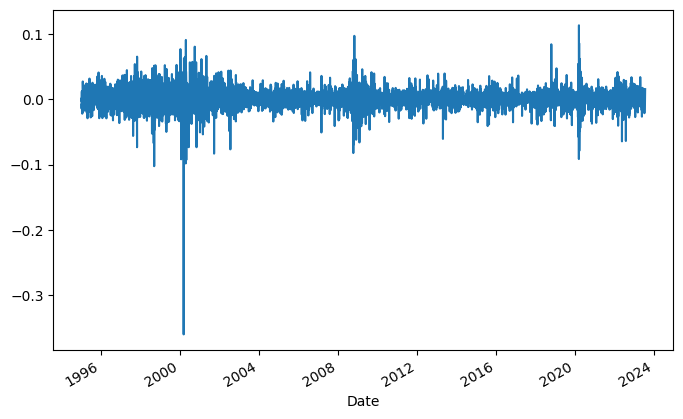

In [7]:
# plotting on a graph
PG['log_return'].plot(figsize=(8,5))
plt.show()
#daily returns, note that positive returns are often followed by negitave returns as regression to the mean comes in to play

### positive returns compund over time , negitave returns are more instant

In [8]:
mean_return = PG['log_return'].mean()
mean_return
#daily log mean return

0.0004163170426156157

In [10]:
# avg log annual rate of return
mean_aar_return = PG['log_return'].mean() * 250
mean_aar_return

0.10407926065390392

In [11]:
str(round(mean_aar_return, 5)*100)+' %'
#avrage annual return of stock PG

'10.408000000000001 %'